<a href="https://colab.research.google.com/github/salehafzoon/Data-Science/blob/main/TensorFlow_Practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check Installation version



In [ ]:
!pip3 install keras

import tensorflow as tf
print("TensorFlow version {}".format(tf.__version__))

TensorFlow version 2.4.1


# Simple statements

In [ ]:
import tensorflow as tf

C = tf.constant([[3],[7]],dtype = tf.float32)
A = tf.Variable([[1,2],[5,6]],dtype = tf.float32)

# zeros and ones use for masking process
B = tf.zeros(shape=(2,3),dtype=tf.float64)

# we usually initiate tensors with onces or zeros cause it leads to higher bias 
D = tf.random.uniform(shape=(2,2), dtype= tf.float32)

# for concating axis size must be the same
# * = inner product
X = tf.concat(values = [A*D,C],axis= 1)

print(X,'\n')

rows , columns = X.shape
print("rows:",rows,"columns:",columns,'\n')

# making identity matrix
i = tf.eye(num_rows = rows,num_columns=columns,dtype= tf.float32)
print('identity matrix = ',i)

tf.Tensor(
[[0.2946874 0.5738044 3.       ]
 [3.3935547 3.0958343 7.       ]], shape=(2, 3), dtype=float32) 

rows: 2 columns: 3 

identity matrix =  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]], shape=(2, 3), dtype=float32)


In [ ]:
#import the functions from Keras sklearn libraries

import math
from keras.models import Sequential      #one tensorflow layer at the time
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error



In [ ]:
#import the necessary libraries

#scipy for scientific math
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns                 #sns will sit on top of matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

#graphic setup
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth = 1)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.as_node_interactivity = 'last_expr'
pd.options.display.max_columns = 50

#can only use in jupyter notebook
%matplotlib inline                  
warnings.filterwarnings('ignore')


# working with data

In [ ]:
import pandas as pd
import io
import requests

data = pd.read_csv('/content/airquality.csv')

#print top 5 rows without parameter
data.head()


,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5




# Some Data sciense analyze

In [ ]:
#Descriptive statistics of the variables

data.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [ ]:
def calculate_quantile(i, df2):
  Q1 = df2[[i]].quantile(0.25)[0]
  Q3 = df2[[i]].quantile(0.75)[0]
  IQR = Q3 - Q1
  min = df2[[i]].min()[0]
  max = df2[[i]].max()[0]
  min_IQR = Q1 - 1.5*IQR
  max_IQR = Q3 + 1.5*IQR
  
  return Q1, Q3, min, max, min_IQR, max_IQR


#delete first and last rows to avoid missing value extrapolation

data.drop(index=[data.index[0],data.index[data.shape[0]-1]], inplace = True)

for i in data.columns:
  print('\nAttribute-',i, ':')
  Q1, Q3, min, max, min_IQR, max_IQR = calculate_quantile(i,data)
  print('Q1 = %.2f' %Q1)
  print('Q3 = %.2f' %Q3)
  print('min_IQR = %.2f' %min_IQR)
  print('max_IQR = %.2f' %max_IQR)

  # finding outliers is important in crime detection
  if(min < min_IQR):
    print('---> Low outlier is found = %.2f' % min)
  if(max > max_IQR):
    print('---> High outlier is found = %.2f' % max)
    


Attribute- Unnamed: 0 :
Q1 = 39.50
Q3 = 114.50
min_IQR = -73.00
max_IQR = 227.00

Attribute- Ozone :
Q1 = 18.00
Q3 = 63.75
min_IQR = -50.62
max_IQR = 132.38
---> High outlier is found = 168.00

Attribute- Solar.R :
Q1 = 114.25
Q3 = 259.00
min_IQR = -102.88
max_IQR = 476.12

Attribute- Wind :
Q1 = 7.40
Q3 = 11.75
min_IQR = 0.88
max_IQR = 18.27
---> High outlier is found = 20.70

Attribute- Temp :
Q1 = 73.00
Q3 = 85.00
min_IQR = 55.00
max_IQR = 103.00

Attribute- Month :
Q1 = 6.00
Q3 = 8.00
min_IQR = 3.00
max_IQR = 11.00

Attribute- Day :
Q1 = 8.00
Q3 = 23.00
min_IQR = -14.50
max_IQR = 45.50


In [ ]:
#log transformation to deal with skewed date

dataset = np.log1p(data[['Temp']].values)
dataset.shape

(151, 1)

<Figure size 864x360 with 0 Axes>

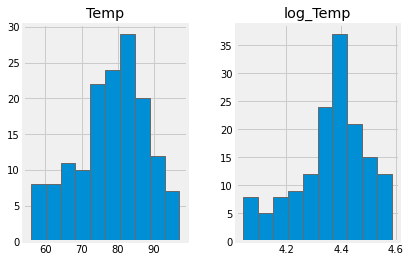

In [ ]:
# Create new dataframe to compare the original vs log transform date
dist_df = pd.DataFrame({'Temp':data['Temp'].values, 'log_Temp':dataset[:,0]})

# Histogram plot original vs Log transform data
plt.figure(figsize= (12,5))
dist_df.hist();


# Preparing train & test data

In [ ]:
# Split the dataset into train and test sets

train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


113 38


In [ ]:
# Convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
  dataX , dataY = [], []
  for i in range (len(dataset)- look_back -1):
    a = dataset[i:(i+look_back),0]
    dataX.append(a)
    dataY.append(dataset[i+look_back , 0])
  return np.array(dataX), np.array(dataY)

# Reshape the train and test data

look_back = 1
trainX, trainY = create_dataset(train, look_back) 
testX, testY = create_dataset(test, look_back) 

print("Shape of trainX :", trainX.shape)
print("Shape of trainY :", trainY.shape)
print("Shape of testX :", testX.shape)
print("Shape of testY :", testY.shape)



Shape of trainX : (111, 1)
Shape of trainY : (111,)
Shape of testX : (36, 1)
Shape of testY : (36,)


In [ ]:
# Reshape the input array in the form - [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print("Shape of trainX: ", trainX.shape)
print("Shape of testX: ", testX.shape)



Shape of trainX:  (111, 1, 1)
Shape of testX:  (36, 1, 1)


In [ ]:
# Create and fit the LSTM neural Network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer = 'adam')
model.fit(trainX, trainY, epochs=300, batch_size = 32, verbose = 2)


Epoch 1/300
4/4 - 2s - loss: 19.4257
Epoch 2/300
4/4 - 0s - loss: 19.2807
Epoch 3/300
4/4 - 0s - loss: 19.1376
Epoch 4/300
4/4 - 0s - loss: 18.9967
Epoch 5/300
4/4 - 0s - loss: 18.8577
Epoch 6/300
4/4 - 0s - loss: 18.7208
Epoch 7/300
4/4 - 0s - loss: 18.5851
Epoch 8/300
4/4 - 0s - loss: 18.4511
Epoch 9/300
4/4 - 0s - loss: 18.3171
Epoch 10/300
4/4 - 0s - loss: 18.1836
Epoch 11/300
4/4 - 0s - loss: 18.0493
Epoch 12/300
4/4 - 0s - loss: 17.9143
Epoch 13/300
4/4 - 0s - loss: 17.7781
Epoch 14/300
4/4 - 0s - loss: 17.6405
Epoch 15/300
4/4 - 0s - loss: 17.5013
Epoch 16/300
4/4 - 0s - loss: 17.3609
Epoch 17/300
4/4 - 0s - loss: 17.2186
Epoch 18/300
4/4 - 0s - loss: 17.0748
Epoch 19/300
4/4 - 0s - loss: 16.9293
Epoch 20/300
4/4 - 0s - loss: 16.7823
Epoch 21/300
4/4 - 0s - loss: 16.6340
Epoch 22/300
4/4 - 0s - loss: 16.4846
Epoch 23/300
4/4 - 0s - loss: 16.3337
Epoch 24/300
4/4 - 0s - loss: 16.1815
Epoch 25/300
4/4 - 0s - loss: 16.0292
Epoch 26/300
4/4 - 0s - loss: 15.8756
Epoch 27/300
4/4 - 0s

In [ ]:
# Make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions

trainPredict = np.expm1(trainPredict)
trainY = np.expm1(trainY)
testPredict = np.expm1(testPredict)
testY = np.expm1(testY)

# Calculate root mean squared error

trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:,0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
print("Test Score: %.2f RMSE" % (testScore))

#if test score is better than train score we over trained and must
# find what we did wrong


Train Score: 9.41 RMSE
Test Score: 10.68 RMSE


In [ ]:
test_series = pd.Series(testY)

# State of model performance

if testScore < test_series.std():
  print("\n[ Model performance is GOOD enough ]")
  print("\nRMSE of test prediction < Standard deviation of test dataset")
  print("%.2f" %(testScore), "<" , "%.2f" %(test_series.std()))

else:
  print("\n[ Model performance is NOT GOOD enough ]")
  print("\nRMSE of test prediction > Standard deviation of test dataset")
  print("%.2f" %(testScore), ">" , "%.2f" %(test_series.std()))

  


[ Model performance is NOT GOOD enough ]

RMSE of test prediction > Standard deviation of test dataset
10.68 > 9.55
